In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
tips=sns.load_dataset("tips")
tips.shape

(244, 7)

In [6]:
tips.groupby('size')

In [7]:
# 
tips['size'].count()

244

In [ ]:
### filter()를 활용 (lambda()와 많이 쓰인다)

In [12]:
# tips.groupby('size').tips['size'].count() 
tips_filtered = tips.groupby('size').filter(lambda x:x['size'].count()>=30)
tips_filtered.shape

(231, 7)

In [15]:
tips_filtered['size'].value_counts()

2    156
3     38
4     37
Name: size, dtype: int64

In [16]:
from datetime import datetime
# date날짜 time시간 datetime날짜+시간

In [24]:
t1 = datetime.now()
t1 #그냥 출력하면 객체 자체가 출력된다 --> datetime.datetime(2019, 7, 12, 13, 41, 47, 681641)
print(t1) # --> 2019-07-12 13:40:44.732642
t2 = datetime.today()
print(t2)
print(datetime(2019,7,12))

2019-07-12 13:43:41.329640
2019-07-12 13:43:41.329640
2019-07-12 00:00:00


In [25]:
datetime.now()-datetime(1993,10,18)

datetime.timedelta(days=9398, seconds=49555, microseconds=179641)

In [30]:
ebola = pd.read_csv("country_timeseries.csv")
# ebola.info()
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(16), int64(1), object(1)
memory usag

In [36]:
test_df1 = pd.DataFrame({
    'order_day':['07/12/19','08/12/19','09/12/19']
})
test_df1

# pd.to_datetime(test_df1['order_day']) #default 변환
# pd.to_datetime(test_df1['order_day'], format="%m/%d/%y") #default와 같다
pd.to_datetime(test_df1['order_day'], format="%d/%m/%y") # %d %m % y에 각 숫자가 받아지고, y-m-d순으로 출력됨

0   2019-12-07
1   2019-12-08
2   2019-12-09
Name: order_day, dtype: datetime64[ns]

In [39]:
test_df2 = pd.DataFrame({
    'order_day':['07-12-19','08-12-19','09-12-19']
})
test_df2
pd.to_datetime(test_df2['order_day'], format="%m-%d-%y")

0   2019-07-12
1   2019-08-12
2   2019-09-12
Name: order_day, dtype: datetime64[ns]

In [42]:
now = datetime.now()
now.strftime('%y-%m-%d')
now.strftime('%Y-%m-%d')
now.strftime('%H:%M:%S')

'14:26:30'

In [47]:
ebola1 = pd.read_csv("country_timeseries.csv",parse_dates=['Date'])
# ebola1.info()
ebola1['Date'][0].year
ebola1['Date'][0].day
ebola1['Date'][0].month


1

In [54]:
# DT 접근자 사용
ebola1['date_dt'] = ebola1['Date']
ebola1['year'] = ebola1['date_dt'].dt.year
ebola1[['Date','date_dt','year']].head()

# x,y=1,2
ebola1['month'],ebola1['day']=ebola1['date_dt'].dt.month, ebola1['date_dt'].dt.day
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
year                   122 non-null int64
month                

In [55]:
ebola.iloc[-5:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015-01-03
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN,2014-12-31
5,12/28/2014,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN,2014-12-28
6,12/27/2014,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,NaN,2732.0,NaN,NaN,NaN,NaN,NaN,2014-12-27
7,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,NaN,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN,2014-12-24
8,12/21/2014,273,2597.0,NaN,9004.0,NaN,NaN,NaN,NaN,NaN,1607.0,NaN,2582.0,NaN,NaN,NaN,NaN,NaN,2014-12-21
9,12/20/2014,272,2571.0,7862.0,8939.0,NaN,NaN,NaN,NaN,NaN,1586.0,3384.0,2556.0,NaN,NaN,NaN,NaN,NaN,2014-12-20


In [60]:
# 최초 발병일 궁금하다면?

ebola1['date_dt']
ebola1['date_dt'].min()
ebola1['outbreak_d'] = ebola1['date_dt'] - ebola1['date_dt'].min()  
ebola1.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt,year,month,day,outbreak_d
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2015-01-05,2015,1,5,289 days
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2015-01-04,2015,1,4,288 days
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2015-01-03,2015,1,3,287 days
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2015-01-02,2015,1,2,286 days
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2014-12-31,2014,12,31,284 days


In [63]:
banks = pd.read_csv("banklist.csv")
banks_no_dates=pd.read_csv("banklist.csv")
banks.head()
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null object
Updated Date             555 non-null object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB


In [64]:
banks = pd.read_csv("banklist.csv",parse_dates=[5,6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null datetime64[ns]
Updated Date             555 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB


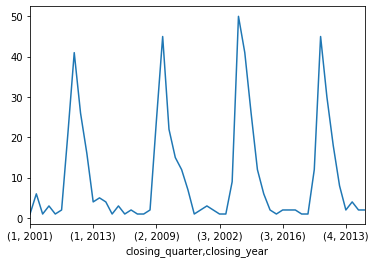

In [74]:
banks['Closing Date'].dt.year
banks['closing_quarter'],banks['closing_year'] = banks['Closing Date'].dt.quarter,banks['Closing Date'].dt.year

closing_year_q = banks.groupby(['closing_quarter','closing_year']).size()
closing_year_q
closing_year_q.plot()

In [70]:
banks.groupby(['closing_year']).size()

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64